In [1]:
from keras.datasets.mnist import load_data
load_data()
((x_train, y_train),(x_test, y_test)) = load_data()

Using TensorFlow backend.


In [2]:
print("訓練資料的維度:", x_train.shape)
print("測試資料的維度:", x_test.shape)


訓練資料的維度: (60000, 28, 28)
測試資料的維度: (10000, 28, 28)


ANS: 7


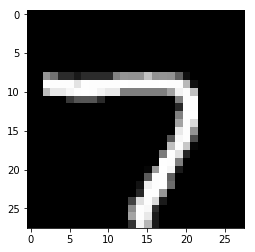

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import random
c = random.randint(0, x_train.shape[0] - 1 )
print("ANS:", y_train[c])
plt.imshow(x_train[c], cmap="gray")

In [4]:
import pandas as pd
pd.DataFrame(x_train[c])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,149,114,43,43,25,43,43,43,...,148,96,15,0,0,0,0,0,0,0
9,0,0,254,253,253,253,227,254,253,253,...,253,253,185,14,0,0,0,0,0,0


In [5]:
# 整理一下
# X進去前一定要常態化(好配合keras一開始隨機的那組weights)
# 還要攤開誠一維
x_train_shape = x_train.reshape(60000,784) / 255
x_test_shape = x_test.reshape(10000,784) / 255
# y進去的時候要 one-hot encoding 3 -> [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
from keras.utils.np_utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [6]:
from keras.models import Sequential
from keras.layers import Dense
mlp = Sequential()
# 第一個中間層, 一定要告訴多少個輸入
mlp.add(Dense(128, input_dim= 784, activation = "relu"))
mlp.add(Dense(10, activation = "softmax"))
mlp.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [7]:
# 訓練前: 確定模型的訓練方式
# 回歸:mse, 二元分類(ouput只有一個):binary_crossentropy. 多元分類(output多於一個): categorical_crossentropy
mlp.compile(optimizer="adam", 
            loss="categorical_crossentropy", 
            metrics=["accuracy"])

In [8]:
# batch: 看幾張圖做一次梯度下降
# epochs: 整個資料集看幾次
# epochs = 10 , batch = 200, 梯度下降次數 = 60000*(1-validation_split)*10/200 = 2700 
mlp.fit(x_train_shape, y_train_cat, 
        batch_size=200, epochs=15, 
        validation_split=0.1,
        verbose=2)

Train on 54000 samples, validate on 6000 samples
Epoch 1/15
 - 1s - loss: 0.4271 - acc: 0.8822 - val_loss: 0.1927 - val_acc: 0.9483
Epoch 2/15
 - 1s - loss: 0.2012 - acc: 0.9426 - val_loss: 0.1409 - val_acc: 0.9627
Epoch 3/15
 - 1s - loss: 0.1486 - acc: 0.9581 - val_loss: 0.1135 - val_acc: 0.9687
Epoch 4/15
 - 1s - loss: 0.1186 - acc: 0.9658 - val_loss: 0.1012 - val_acc: 0.9715
Epoch 5/15
 - 1s - loss: 0.0971 - acc: 0.9724 - val_loss: 0.0894 - val_acc: 0.9743
Epoch 6/15
 - 1s - loss: 0.0817 - acc: 0.9760 - val_loss: 0.0830 - val_acc: 0.9762
Epoch 7/15
 - 1s - loss: 0.0696 - acc: 0.9804 - val_loss: 0.0833 - val_acc: 0.9772
Epoch 8/15
 - 1s - loss: 0.0592 - acc: 0.9833 - val_loss: 0.0771 - val_acc: 0.9787
Epoch 9/15
 - 1s - loss: 0.0520 - acc: 0.9854 - val_loss: 0.0849 - val_acc: 0.9738
Epoch 10/15
 - 1s - loss: 0.0458 - acc: 0.9873 - val_loss: 0.0759 - val_acc: 0.9772
Epoch 11/15
 - 1s - loss: 0.0386 - acc: 0.9900 - val_loss: 0.0723 - val_acc: 0.9795
Epoch 12/15
 - 1s - loss: 0.0346 - a

In [9]:
mlp.evaluate(x_test_shape,y_test_cat)

10000/10000 [==============================] - 0s 18us/step


[0.07425960699354764, 0.9778]

In [10]:
from sklearn.metrics import confusion_matrix
import pandas as pd
pd.DataFrame(confusion_matrix(y_test, mlp.predict_classes(x_test_shape)))

,0,1,2,3,4,5,6,7,8,9
0,970,0,1,0,1,1,4,1,2,0
1,0,1123,4,0,0,1,2,2,3,0
2,3,0,1009,0,3,0,3,6,7,1
3,1,0,4,985,0,4,0,7,3,6
4,1,0,2,1,956,0,4,3,2,13
5,2,0,0,9,1,861,6,2,6,5
6,3,2,3,1,2,3,942,0,2,0
7,1,2,9,2,2,0,0,1002,1,9
8,9,0,2,4,3,2,2,4,942,6
9,1,2,0,3,7,2,0,5,1,988


In [12]:
#Pillow
from PIL import Image
import numpy as np
fn = input("你想要輸入的圖片名稱")
img1 = np.array(Image.open(fn).resize((28, 28)).convert("L"))
x_pre = np.array([img1]).reshape(1,784) / 255

你想要輸入的圖片名稱test.png


預測結果: [8]


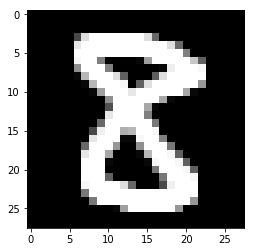

In [13]:
print("預測結果:", mlp.predict_classes(x_pre))
plt.imshow(img1,cmap="gray")